In [1]:
import os
os.chdir('/media/gambino/students_workdir/nynke/blurry_model/blurry')
path_io = 'io_data.py'
path_utils = 'utils.py'
path_analyze = 'analyze.py'

In [2]:
import io_data

/media/gambino/students_workdir/nynke/miniconda3/envs/blurry/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
adata = io_data.loadSpatialDataset(single_gene_images_glob = "/media/gambino/students_workdir/nynke/blurry_model/ileum_data/mouse_ileum/coordinate_parsed/*.tif", adata_to_concat="blurry")

Loading images: 100%|██████████| 3514/3514 [00:02<00:00, 1232.93image/s]


<class 'io_data.ImageDatasetWithDapis'>


100%|██████████| 7/7 [00:01<00:00,  4.07it/s]
/media/gambino/students_workdir/nynke/miniconda3/envs/blurry/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/media/gambino/students_workdir/nynke/miniconda3/envs/blurry/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/media/gambino/students_workdir/nynke/miniconda3/envs/blurry/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass 

In [20]:
adata.obsm['latent']

array([[-2.1722023 ,  1.6791011 , -0.5297107 , ..., -6.7247434 ,
        -8.94485   ,  5.0123415 ],
       [-1.374923  ,  1.9097035 , -0.08680037, ..., -6.6147814 ,
        -9.038015  ,  5.151763  ],
       [-2.36035   ,  2.2622015 , -1.8720508 , ..., -7.36214   ,
        -8.34992   ,  6.637345  ],
       ...,
       [ 1.3359199 ,  2.8508332 , -0.6817542 , ..., -2.1741989 ,
        -6.484071  ,  5.9352036 ],
       [ 1.1424431 ,  3.6253402 , -1.7294004 , ..., -1.6513839 ,
        -6.1714263 ,  5.6092153 ],
       [ 1.0807673 ,  2.046837  , -1.393578  , ..., -2.3057594 ,
        -7.273934  ,  6.0288467 ]], dtype=float32)

In [4]:
adata.obs['pattern'].value_counts()

random          63033
intranuclear    31536
pericellular    31536
perinuclear     31536
cell-edge       31530
extranuclear    31516
spatial          3514
Name: pattern, dtype: int64

In [5]:
# removing the biological real data from the similated data
adata = adata[adata.obs['pattern']!='spatial']
adata.obs

,pattern,random_or_pattern,n_spots,n_spots_interval,cell_id,genes,rotation,rotation_interval,blur,blur_interval,...,pattern_classified,cell-edge,extranuclear,intranuclear,pericellular,perinuclear,random,random_score,pattern_score,batch
0-0,cell-edge,pattern,100,100+,blank,blank,124,120-180,1.5,NaN,...,random,9.985172e-01,0.422161,2.038958e-18,8.139958e-18,1.522162e-11,0.999980,0.806723,0.193872,0
1-0,cell-edge,pattern,100,100+,blank,blank,161,120-180,1.5,NaN,...,random,9.996459e-01,0.938447,9.300263e-20,9.723175e-17,1.278433e-09,0.999978,0.786449,0.214457,0
2-0,cell-edge,pattern,100,100+,blank,blank,57,0-60,1.5,NaN,...,random,9.929121e-01,0.868868,2.720590e-19,1.327658e-16,1.400917e-09,0.997670,0.613716,0.387979,0
3-0,cell-edge,pattern,100,100+,blank,blank,96,60-120,1.5,NaN,...,random,9.974719e-01,0.683816,2.393022e-18,1.593811e-17,2.160465e-10,0.999952,0.816660,0.184197,0
4-0,cell-edge,pattern,100,100+,blank,blank,245,240-300,1.5,NaN,...,cell-edge,9.991395e-01,0.997390,2.491777e-19,1.006105e-10,3.958879e-08,0.007829,0.058782,0.941308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220682-0,random,random,99,100+,blank,blank,193,180-240,1.5,NaN,...,random,2.101227e-05,0.004966,9.210425e-13,2.441267e-30,3.942036e-05,1.000000,0.999117,0.000895,0
220683-0,random,random,99,100+,blank,blank,196,180-240,1.5,NaN,...,random,1.683812e-07,0.002076,2.011644e-14,6.885430e-33,5.124744e-05,1.000000,0.998786,0.001229,0
220684-0,random,random,99,100+,blank,blank,247,240-300,1.5,NaN,...,random,3.827430e-04,0.000675,6.427072e-12,2.209788e-29,3.792834e-07,1.000000,0.998853,0.001155,0
220685-0,random,random,99,100+,blank,blank,302,300+,1.5,NaN,...,random,1.809081e-08,0.000406,4.297435e-13,2.204371e-32,2.143221e-03,1.000000,0.998953,0.001053,0


In [6]:
adata.obs.reset_index(drop=True, inplace=True)
adata.obs

,pattern,random_or_pattern,n_spots,n_spots_interval,cell_id,genes,rotation,rotation_interval,blur,blur_interval,...,pattern_classified,cell-edge,extranuclear,intranuclear,pericellular,perinuclear,random,random_score,pattern_score,batch
0,cell-edge,pattern,100,100+,blank,blank,124,120-180,1.5,NaN,...,random,9.985172e-01,0.422161,2.038958e-18,8.139958e-18,1.522162e-11,0.999980,0.806723,0.193872,0
1,cell-edge,pattern,100,100+,blank,blank,161,120-180,1.5,NaN,...,random,9.996459e-01,0.938447,9.300263e-20,9.723175e-17,1.278433e-09,0.999978,0.786449,0.214457,0
2,cell-edge,pattern,100,100+,blank,blank,57,0-60,1.5,NaN,...,random,9.929121e-01,0.868868,2.720590e-19,1.327658e-16,1.400917e-09,0.997670,0.613716,0.387979,0
3,cell-edge,pattern,100,100+,blank,blank,96,60-120,1.5,NaN,...,random,9.974719e-01,0.683816,2.393022e-18,1.593811e-17,2.160465e-10,0.999952,0.816660,0.184197,0
4,cell-edge,pattern,100,100+,blank,blank,245,240-300,1.5,NaN,...,cell-edge,9.991395e-01,0.997390,2.491777e-19,1.006105e-10,3.958879e-08,0.007829,0.058782,0.941308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220682,random,random,99,100+,blank,blank,193,180-240,1.5,NaN,...,random,2.101227e-05,0.004966,9.210425e-13,2.441267e-30,3.942036e-05,1.000000,0.999117,0.000895,0
220683,random,random,99,100+,blank,blank,196,180-240,1.5,NaN,...,random,1.683812e-07,0.002076,2.011644e-14,6.885430e-33,5.124744e-05,1.000000,0.998786,0.001229,0
220684,random,random,99,100+,blank,blank,247,240-300,1.5,NaN,...,random,3.827430e-04,0.000675,6.427072e-12,2.209788e-29,3.792834e-07,1.000000,0.998853,0.001155,0
220685,random,random,99,100+,blank,blank,302,300+,1.5,NaN,...,random,1.809081e-08,0.000406,4.297435e-13,2.204371e-32,2.143221e-03,1.000000,0.998953,0.001053,0


In [11]:
adata

View of AnnData object with n_obs × n_vars = 220687 × 15
    obs: 'pattern', 'random_or_pattern', 'n_spots', 'n_spots_interval', 'cell_id', 'genes', 'rotation', 'rotation_interval', 'blur', 'blur_interval', 'prop', 'prop_interval', 'corresponding_dapis', 'original_image_paths', 'binary_classified', 'classified', 'pattern_classified', 'cell-edge', 'extranuclear', 'intranuclear', 'pericellular', 'perinuclear', 'random', 'random_score', 'pattern_score', 'batch'
    obsm: 'latent'

In [19]:
adata.obs['original_image_paths']

0         /mnt/data/david/simulated_cells/with_dapi/even...
1         /mnt/data/david/simulated_cells/with_dapi/even...
2         /mnt/data/david/simulated_cells/with_dapi/even...
3         /mnt/data/david/simulated_cells/with_dapi/even...
4         /mnt/data/david/simulated_cells/with_dapi/even...
                                ...                        
220682    /mnt/data/david/simulated_cells/with_dapi/even...
220683    /mnt/data/david/simulated_cells/with_dapi/even...
220684    /mnt/data/david/simulated_cells/with_dapi/even...
220685    /mnt/data/david/simulated_cells/with_dapi/even...
220686    /mnt/data/david/simulated_cells/with_dapi/even...
Name: original_image_paths, Length: 220687, dtype: object

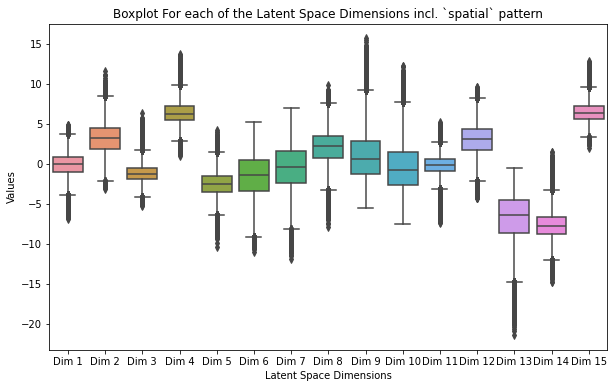

In [58]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data
data = adata.obsm['latent']
categories = ['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7', 'Dim 8', 'Dim 9', 'Dim 10', 'Dim 11', 'Dim 12', 'Dim 13', 'Dim 14', 'Dim 15']

# Create a DataFrame with the data and categories
df = pd.DataFrame(data, columns=categories)

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(df, var_name='Category', value_name='Value')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=df_melted)

# Customize the plot (optional)
plt.title('Boxplot For each of the Latent Space Dimensions incl. `spatial` pattern')
plt.xlabel('Latent Space Dimensions')
plt.ylabel('Values')

# Show the plot
plt.show()


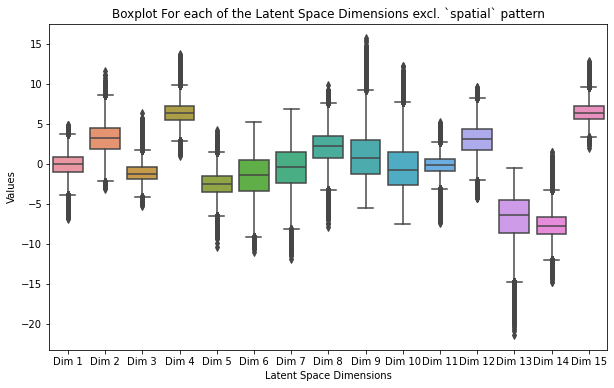

In [59]:
data = adata_test.obsm['latent']
categories = ['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7', 'Dim 8', 'Dim 9', 'Dim 10', 'Dim 11', 'Dim 12', 'Dim 13', 'Dim 14', 'Dim 15']

# Create a DataFrame with the data and categories
df = pd.DataFrame(data, columns=categories)

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(df, var_name='Category', value_name='Value')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=df_melted)

# Customize the plot (optional)
plt.title('Boxplot For each of the Latent Space Dimensions excl. `spatial` pattern')
plt.xlabel('Latent Space Dimensions')
plt.ylabel('Values')

# Show the plot
plt.show()


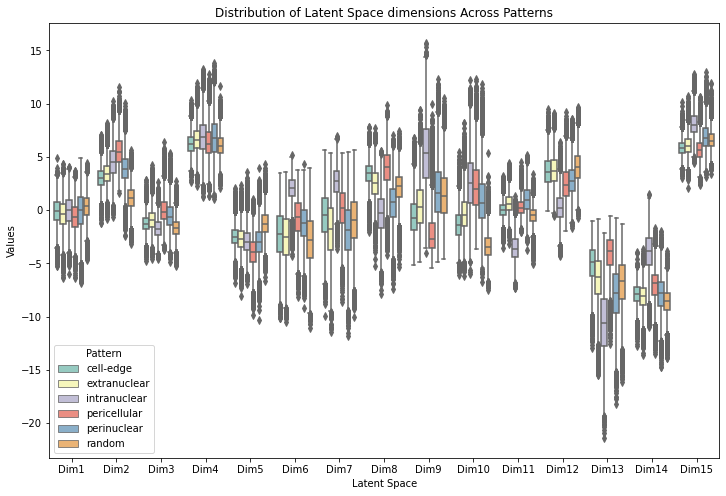

In [65]:
# Creating a DataFrame
data = adata_test.obsm['latent']
df = pd.DataFrame(data, columns=[f'Dim{i+1}' for i in range(15)])
df['Pattern'] = adata_test.obs['pattern']

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(df, id_vars='Pattern', var_name='Variable', value_name='Value')

# Create a grouped boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Variable', y='Value', hue='Pattern', data=df_melted, palette='Set3')

# Customize the plot (optional)
plt.title('Distribution of Latent Space dimensions Across Patterns')
plt.xlabel('Latent Space')
plt.ylabel('Values')

# Show the plot
plt.show()

In [69]:
# subsetting the data for AMSA

value_counts = df['Pattern'].value_counts()

# Create a new DataFrame with the desired subset
subset_df = pd.DataFrame()

# Include 6000 'random'
subset_df = pd.concat([subset_df, df[df['Pattern'] == 'random'].head(6000)])

# Include 3000 of each of the other values
for category, count in value_counts.items():
    if category != 'random':
        subset_df = pd.concat([subset_df, df[df['Pattern'] == category].head(3000)])

# Display the resulting DataFrame
print(subset_df)

            Dim1      Dim2      Dim3  ...      Dim14     Dim15       Pattern
157654  0.520007  0.211106 -0.854739  ...  -8.948178  7.826795        random
157655 -0.017092  0.178973 -2.659073  ...  -7.386280  6.348604        random
157656  0.051713  0.849909 -1.960923  ...  -9.147243  5.839666        random
157657  0.287385 -0.016799 -0.709321  ...  -9.521603  6.815447        random
157658  0.465453  0.099659 -0.491207  ...  -9.496098  7.675272        random
...          ...       ...       ...  ...        ...       ...           ...
34525  -2.418665  5.618591  1.464017  ... -10.918552  4.235606  extranuclear
34526  -2.105492  2.914816 -0.302624  ...  -8.581188  7.618269  extranuclear
34527  -3.535192  3.614291 -2.518671  ...  -8.444427  5.193312  extranuclear
34528   0.572893  2.976490  0.951096  ...  -8.007727  6.596453  extranuclear
34529  -1.262492  4.452964 -1.461096  ...  -9.076557  6.221122  extranuclear

[21000 rows x 16 columns]


In [70]:
subset_df.to_csv('10percent_amsa.csv', index=False)